In [1]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import h5py
import json
import pickle
import glob

In [2]:
file_list = []
for file in glob.glob(r"C:\LINHC\VersucheDBs\Trelleborg\2021-01-27-V24\*\*.h5"):
    file_list.append(file)
file_list

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs

20210202_4_Phase_C-F_LEM1
ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>
Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


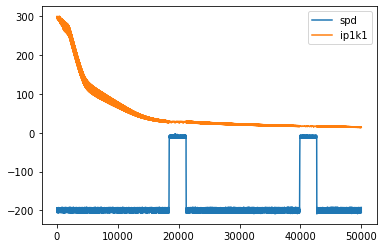

In [3]:
# choose 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5'
file = file_list[4]
filename = file.split('\\')[-1][:-3]
h51 = h5py.File(file, "r")

print(filename)
print("ATTR:")
print(h51.attrs.keys())
print("Keys:")
print(h51.keys())


plt.plot(h51['spd1'][:50000], label = 'spd')
plt.plot(h51['ip1k1'][:50000], label = 'ip1k1')
plt.legend()

In [4]:
low = np.where(h51['spd1'][:]>-50)[0]
# skip the lsa in first 10000 points because some wierd patterns in speed, 
# check 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5', 
low = low[low>10000]
pos_low = h51['pos1'][low]
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)
Ls = np.append(low[low_sep],low[-1])
Fs = np.append(low[0],low[low_sep+1])
if filename in ["20210218_7_Phase_C-F_LEM1","20210218_7_Phase_C-F_LEM2"]:
    Ls = Ls[:-1]
    Fs = Fs[:-1]
print("timestamps of Fs:\n", Fs)
print("timestamps of Ls:\n", Ls)
print("Durations of lsa:\n", Ls-Fs)

timestamps of Fs:
 [  18442   39900   61358   82813  104273  125729  147185  168641  190098
  211553  233008  254464  275920  297375  318829  340288  361742  383198
  404656  426110  447566  469020  490479  511938  533396  554853  576313
  597769  619229  640685  662145  683600  705056  726510  747964  769420
  790878  812336  833795  855251  876709  898165  919625  941080  962534
  983994 1005450 1026909 1048363 1069821]
timestamps of Ls:
 [  21215   42674   64129   85589  107045  128501  149958  171414  192869
  214324  235780  257236  278691  300146  321604  343058  364514  385972
  407426  428882  450338  471795  493254  514711  536169  557629  579085
  600545  622001  643461  664916  686372  707826  729280  750737  772194
  793652  815111  836567  858025  879481  900941  922396  943851  965310
  986766 1008225 1029679 1051137 1072595]
Durations of lsa:
 [2773 2774 2771 2776 2772 2772 2773 2773 2771 2771 2772 2772 2771 2771
 2775 2770 2772 2774 2770 2772 2772 2775 2775 2773 2773 27

In [5]:
shift_opts_freqs = pickle.load( open( "./data/shift_opts_freqs/" +filename + ".pkl", "rb" ) )
shift_opts_freqs.shape

(121, 50)

In [6]:
X = np.array(h51['t'][Fs]).reshape(-1,1)
y = np.array(shift_opts_freqs[0]).reshape(-1,1)

<AxesSubplot:>

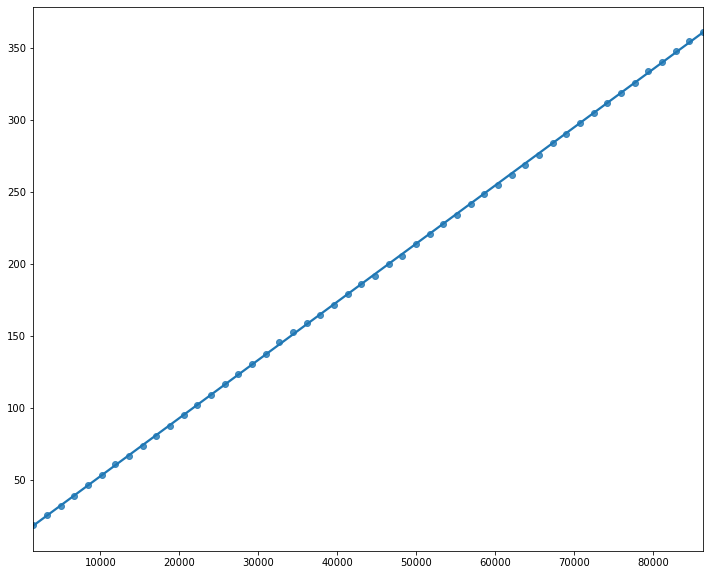

In [7]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

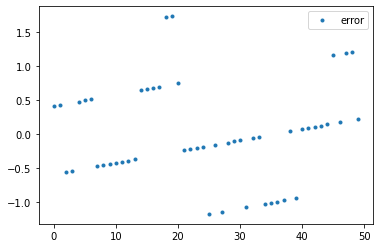

In [9]:
err = y - reg.predict(X)
plt.plot(err,'.',label = 'error')
plt.legend()

In [10]:
shift_opts_freqs[0]

array([ 19,  26,  32,  39,  47,  54,  61,  67,  74,  81,  88,  95, 102,
       109, 117, 124, 131, 138, 146, 153, 159, 165, 172, 179, 186, 192,
       200, 206, 214, 221, 228, 234, 242, 249, 255, 262, 269, 276, 284,
       290, 298, 305, 312, 319, 326, 334, 340, 348, 355, 361])

In [11]:
shift = reg.predict(np.array(h51['t']).reshape(-1,1))
t_shift = np.array(h51['t']).reshape(-1,1) - shift

In [12]:
shift.shape

(1088164, 1)

In [13]:
shift.round()

array([[ 13.],
       [ 13.],
       [ 13.],
       ...,
       [367.],
       [367.],
       [367.]])

## LR

In [14]:
shift_opts_freqs_all = []
for i in range (121):
    X = np.array(h51['t'][Fs]).reshape(-1,1)
    y = np.array(shift_opts_freqs[i]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    shift = reg.predict(np.array(h51['t']).reshape(-1,1))
    shift_opts_freqs_all.append(shift)

In [15]:
shift_opts_freqs_all = np.array(shift_opts_freqs_all).squeeze()
shift_opts_freqs_all.shape

(121, 1088164)

## Check

In [16]:
shift_opts_freqs[10] # grid search

array([ 19,  26,  32,  39,  47,  54,  61,  67,  74,  81,  89,  96, 103,
       110, 117, 124, 131, 137, 145, 153, 160, 166, 173, 180, 187, 193,
       201, 207, 215, 222, 229, 236, 244, 250, 258, 264, 271, 277, 285,
       291, 299, 306, 313, 320, 327, 335, 341, 348, 355, 361])

In [17]:
shift_opts_freqs_all[10][Fs].round() # LR

array([ 19.,  26.,  33.,  40.,  47.,  54.,  61.,  68.,  75.,  82.,  89.,
        96., 103., 110., 117., 124., 131., 138., 145., 152., 159., 166.,
       173., 180., 187., 194., 201., 208., 215., 222., 229., 236., 243.,
       250., 257., 264., 271., 278., 285., 292., 299., 306., 313., 320.,
       327., 334., 341., 348., 355., 362.])

## Training

In [18]:
N = 100 # ignore first N points
s21 = np.array(h51['S21_P1_LEM1'])
dataset = []
for j in range (121):
    index = np.arange(N,len(h51['t'])) - shift_opts_freqs_all[j,N:].round().astype(int)
    dataset.append(s21[index,j].real)
    dataset.append(s21[index,j].imag)
    
X = np.asarray(dataset).T
y = np.asarray(h51['ip1k1'][N:])
print("X:")
print(X.shape)
print("y:")
print(y.shape)

X:
(1088064, 242)
y:
(1088064,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_scaled, y_train) # trainig time for 10 trees: >2h

RandomForestRegressor(n_estimators=10)

In [22]:
# save the file
filename = './models/rf_ip1k1_20210202_4_Phase_C-F_LEM1.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [23]:
# # load the model from disk
# filename = './models/rf_ip1k1_20210202_4_Phase_C-F_LEM1.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

In [24]:
rf.score(X_test_scaled, y_test)

0.9731096133200051

mean of the errors:  0.34567222018147065
median of the errors:  0.07522578239440936


<IPython.core.display.Javascript object>


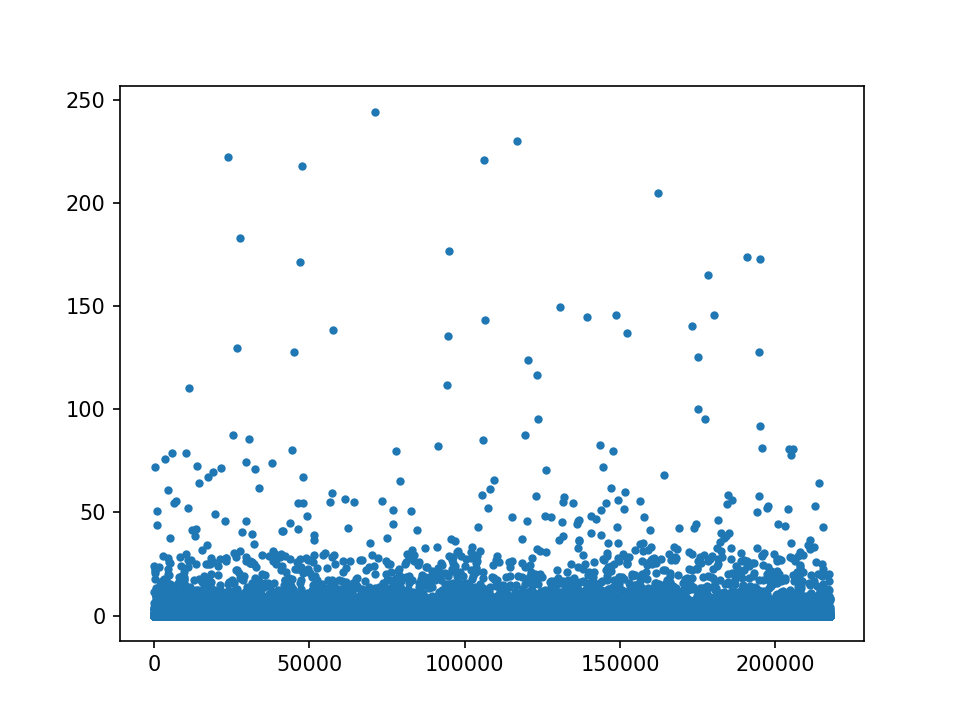

In [32]:
err = abs(rf.predict(X_test_scaled) - y_test)
print("mean of the errors: ", np.mean(err))
print("median of the errors: ", np.median(err))
plt.plot(err,'.')

In [29]:
feature_lookup_rev = {}
for i in range(121*2):
    if i%2==0:
        feature_lookup_rev[i] = 's21-'+str(i//2)+'-real'
    else:
        feature_lookup_rev[i] = 's21-'+str(i//2)+'-imag' 

In [30]:
# feature ranking
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X_train_scaled.shape[1]):
    print("%d. feature %d, %s :(%f)" % 
          (i + 1, indices[i],feature_lookup_rev[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature 0, s21-0-real :(0.082143)
2. feature 90, s21-45-real :(0.054225)
3. feature 58, s21-29-real :(0.045639)
4. feature 4, s21-2-real :(0.040864)
5. feature 89, s21-44-imag :(0.039397)
6. feature 88, s21-44-real :(0.036149)
7. feature 61, s21-30-imag :(0.036119)
8. feature 10, s21-5-real :(0.035811)
9. feature 78, s21-39-real :(0.033144)
10. feature 71, s21-35-imag :(0.030637)
11. feature 22, s21-11-real :(0.030071)
12. feature 48, s21-24-real :(0.027936)
13. feature 5, s21-2-imag :(0.021515)
14. feature 91, s21-45-imag :(0.020969)
15. feature 92, s21-46-real :(0.018463)
16. feature 57, s21-28-imag :(0.017747)
17. feature 62, s21-31-real :(0.015494)
18. feature 17, s21-8-imag :(0.015016)
19. feature 18, s21-9-real :(0.014505)
20. feature 1, s21-0-imag :(0.014393)
21. feature 16, s21-8-real :(0.013836)
22. feature 47, s21-23-imag :(0.013798)
23. feature 20, s21-10-real :(0.013365)
24. feature 68, s21-34-real :(0.013264)
25. feature 177, s21-88-imag :(0.012805)
26.

<IPython.core.display.Javascript object>


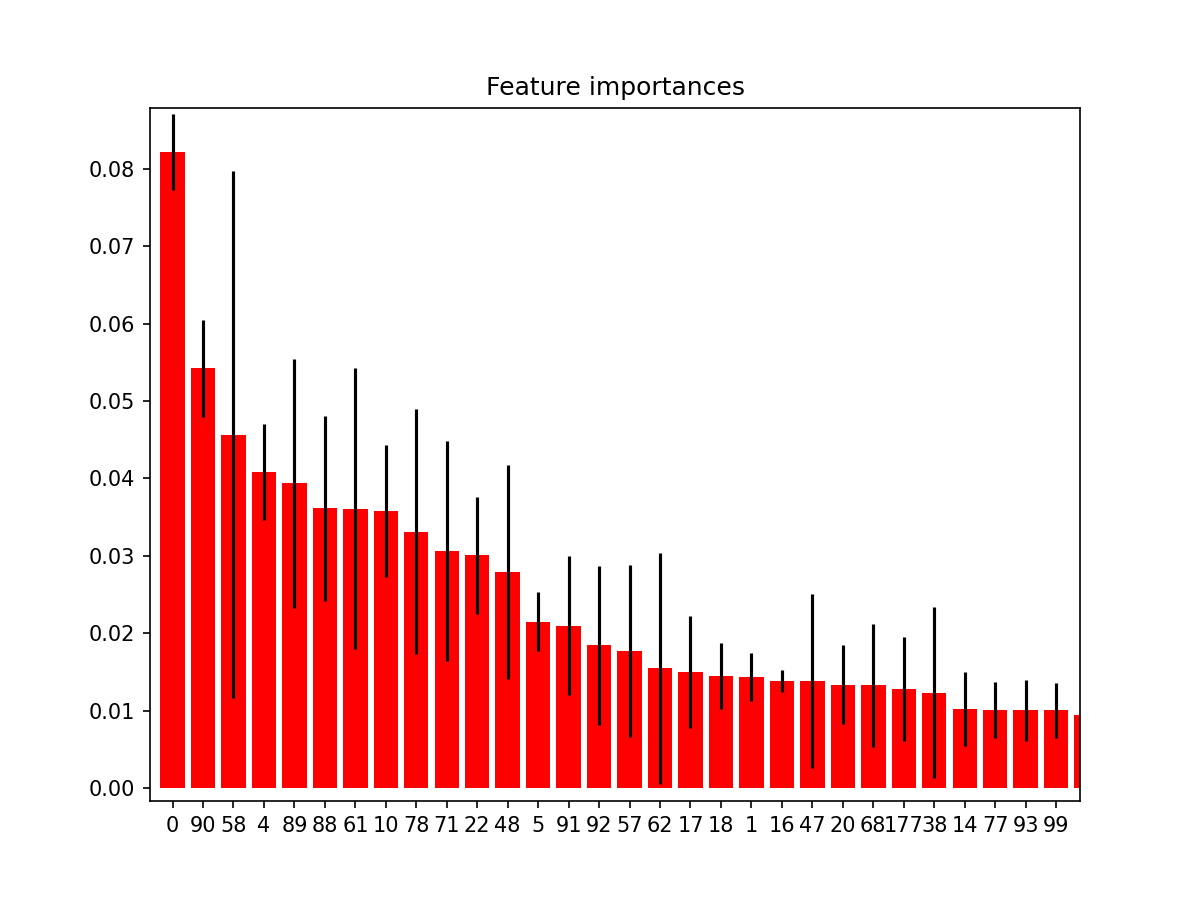

In [31]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Plot the impurity-based feature importances of the forest
%matplotlib nbagg
plt.figure(figsize = (8,6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()